# **Airline Consumer Sentiment & Competitor Performance Analysis**

*Contributors : Manyi Hong, Pratik Mahajan, Omar Alwehaib, Mingshu Hong, Divyesh Sai Annavarapu, Yash Kothari*

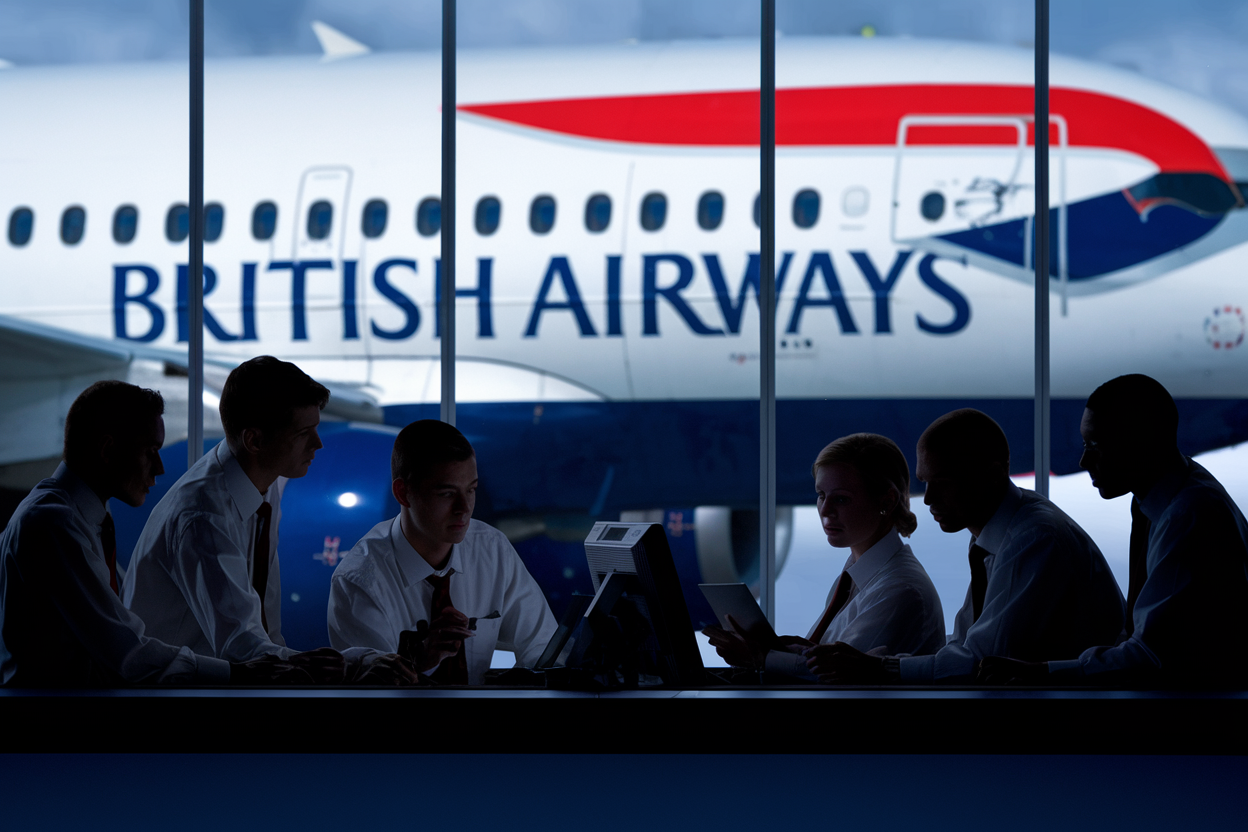

#**Executive Summary**


The aim of this report was to conduct an in-depth analysis of operational data and customer feedback for British Airways in determining various factors which affect customer satisfaction and operational efficiency. In an increasingly competitive airline industry, maintaining high levels of customer satisfaction while optimizing operational efficiency is essential for sustaining profitability and growth.
Understanding the key factors for other airlines which help the customer or a passenger recommend the flight has given us insights about what are the factors British Airways should focus on. We also now know which demographics British Airways should target and what their preferences are. For example, highest flown miles are in the Pacific and Atlantic region and the Boomers are the most avid travellers.
Delays during peak hours greatly minimize customer satisfaction, since staff service and in-flight service are the most highly rated influencers of the airline industry. Inefficiencies in operations such as technical issues and staffing decrease profitability by increasing cancellations and compensation claims. After mapping out the trends and correlations, we recommend flight scheduling, technical maintenance to avoid delays and cancellations, and improving customer service in a way that will help in enhancing general performance and satisfaction. These will, in turn, aid British Airways in improving its operations and customer loyalty. It will be insightful if we find any financial analysis on the dataset to analyze if there are any financial factors affecting the low rating of British Airways.


#**Variable Dictionary**


| **Variable Name**      | **Type**   | **Description**                                                                              | **Columns (if DataFrame)**                                                                                 |
|------------------------|------------|----------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------|
| `df_ba`                | DataFrame  | Contains customer reviews and flight details                                                | `Passenger_Name`, `Flying_month`, `Route`, `Rating`, `Verified`, `Review_title`, `Review_content`, `Traveller_type`, `Class`, `Review_Sentiment` |
| `df_comment`           | DataFrame  | Contains detailed customer feedback and survey responses                                    | `flight_number`, `origin_station_code`, `destination_station_code`, `scheduled_departure_date`, `arrival_delay_group`, `departure_delay_group`, `verbatim_text`, `seat_factor_band`, `fleet_type_description`, `loyalty_program_level`, `sentiments` |
| `df_survey`            | DataFrame  | Contains survey data about inflight experience and satisfaction                              | `flight_number`, `score`, `origin_station_code`, `destination_station_code`, `scheduled_departure_date`, `generation`, `haul_type`, `arrival_delay_minutes`, `fleet_usage` |
| `df_survey_comment`    | DataFrame  | Merged dataset from `df_comment` and `df_survey` using a unique ID                           | `id`, `score`, `origin_station_code`, `destination_station_code`, `arrival_delay_group`, `departure_delay_group` |
| `normalize_rating()`   | Function   | Converts ratings ≤ 5 to a 10-point scale                                                     | Applied to the `Rating` column in `df_ba`                                                                   |
| `format_Passenger_name()` | Function | Formats passenger names as `Initial. Lastname`                                               | Applied to the `Passenger_Name` column in `df_ba`                                                            |
| `mask`                 | Array      | Used for word cloud visualization with an airplane icon mask                                 | N/A                                                                                                         |
| `id`                   | String     | Unique identifier generated by concatenating flight details                                  | Used in `df_survey_comment` for merging datasets                                                            |
| **Generated Columns**  |            |                                                                                              |                                                                                                             |
| `Origin`               | Column     | Extracted from `Route`                                                                       | N/A                                                                                                         |
| `Destination`          | Column     | Extracted from `Route`                                                                       | N/A                                                                                                         |
| `Review_Sentiment`     | Column     | Classifies reviews as `Positive` or `Negative` based on ratings                              | N/A


#**1. Project Objective**



British Airways is one of the United Kingdom's leading airlines, offering numerous flights within the United Kingdom and other countries. It connects major destinations throughout Europe, North America, Asia, Africa, and Australia, therefore providing several options for its travelers. The airline provides Economy, Premium Economy, Business, and First Class service classes that target a number of different tastes among passengers. British Airways is widely known for the perfect service-classical British tint with its modern convenience embodiment. Moreover, British Airways controls a significant market share in the transatlantic route and is a vital player in the global aviation industry.

**Problem Definition**


> 01 Understanding the performance of the British Airways by analyzing their customer reviews dataset

> 02 Determining the key factors for customer satisfaction and comparing it with those of other airlines

> 03 Identifying consumer segmentation to improve consumer conversion rate of booking

> 04 Correlate shifts in satisfaction scores and booking patterns across years and types of travelers

> 05 Using machine learning to identify the sentiment of each review and comprehending satisfaction patterns

The primary objective of this project is to conduct a comprehensive data analysis of British Airways’ operations and customer feedback. We will focus on answering key questions such as:
- What are the key factors contributing to customer satisfaction or dissatisfaction?
- Are there specific patterns in flight delays or cancellations that can be mitigated?
- How do different operational metrics (such as staff performance, service speed, and route efficiency) correlate with overall airline performance?
- How British Airways performs compared to other airlines in terms of customer satisfaction?
- What does the customer booking journey tell us about the demands of passengers?


This analysis will leverage Python’s data analytics capabilities to clean, explore, and visualize the data, helping British Airways gain deeper insights into their operations. The insights will assist the airline in making data-driven decisions aimed at optimizing service quality, minimizing operational disruptions, and improving customer satisfaction.


#**2. Data Source**





The dataset is from British Airways and other airlines which consists of Airline Scrapped Review, Customer comment, Passenger booking, Survey data with Inflight Satisfaction Score.

https://www.kaggle.com/datasets/manishkumar7432698/airline-passangers-booking-data

The following dataset is from multiple airlines, it comes with one file which consists of reviews and satisfaction data of 10 major airlines.

https://www.kaggle.com/datasets/sujalsuthar/airlines-reviews

And lastly, this dataset is associated with passengers rating domestic flight in United States of America.

https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction



#**3. Motivation**


British Airways, like many global carriers, faces challenges related to flight delays, cancellations, and customer service, which directly affect customer loyalty and financial performance. As international students, some of us have faced issues with British Airways which motivated us to find the key issues and analyze if this problem is consistent with all class types and other types of travelers.By identifying patterns in customer satisfaction and operational metrics, we seek to offer data-driven recommendations that will help the airline improve service quality, reduce operational disruptions, and enhance overall performance.

#**4. Importing File and Loading Dictionaries**

In [ ]:
!pip install wordcloud --upgrade
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly
import seaborn as sns
import missingno as msno
from scipy import stats
import warnings
from bokeh.io import output_file, show, output_notebook, push_notebook
from bokeh.plotting import figure, show
from bokeh.models import CDSView, GroupFilter, CustomJS, Dropdown, ColumnDataSource, LabelSet, HoverTool, ColorBar
from math import pi, sin, cos
from bokeh.layouts import column, row
from bokeh.palettes import Category10, Category20
warnings.filterwarnings("ignore")
from bokeh.transform import linear_cmap
from bokeh.palettes import Viridis256
from ipywidgets import interact, Dropdown


# Changed 'Wordcloud' to 'WordCloud' to match the class name in the wordcloud module
from wordcloud import WordCloud
import requests
from PIL import Image

In [ ]:
df_ba = pd.read_csv('https://raw.githubusercontent.com/ymk1003/BA780-A09/main/AirlineScrappedReview.csv')
df_comment = pd.read_csv('https://raw.githubusercontent.com/ymk1003/BA780-A09/main/Customer_comment.csv')
df_survey = pd.read_csv('https://raw.githubusercontent.com/ymk1003/BA780-A09/main/Survey%20data_Inflight%20Satisfaction%20Score.csv')
df_domestic_test = pd.read_csv('https://raw.githubusercontent.com/ymk1003/BA780-A09/main/test.csv')
df_domestic_train = pd.read_csv('https://raw.githubusercontent.com/ymk1003/BA780-A09/main/train.csv')
df_other_airlines = pd.read_csv('https://raw.githubusercontent.com/ymk1003/BA780-A09/main/Other_airlines_reviews.csv')
df_passenger_data = pd.read_csv('https://raw.githubusercontent.com/ymk1003/BA780-A09/main/Passanger_booking_data.csv')

In [ ]:
df_ba.info()

In [ ]:
df_comment.info()

In [ ]:
df_survey.info()

#**5. Data Preparation and Data Cleaning**

**5.1 Overview and cleaning df_ba**





Cleaning the dataset to ensure that the analysis is accurate and reliable. The following steps are applied to the data:

1. Handling Missing Values: We check for missing values in important columns like customer satisfaction scores and delay reasons. For missing categorical values, we fill with "Unknown" or drop them.

2. **Removing Duplicates**: Traveller identifiers like 'id' combined with Flight Date and other factors, could create duplicate rows; we cumcount and make them unique to avoid omission of necessary values.

> The `df_ba.info()` function presents the structure of the dataset, showing missing values in key columns required for rating. These missing values will be taken care of during data cleaning and correct data types to perform accurate analysis going further.

In [ ]:
#Printing out the shape of df_ba
nRow, nCol = df_ba.shape
print(f'There are {nRow} rows and {nCol} columns')



In [ ]:
df_ba.dtypes

>This output shows the data types of the columns in the dataset. It indicates that most of the columns, such as `Passenger_Name`, `Flying_month`, `Route`, `Verified`, `Review_title`, `Review_content`, `Traveller_type`, and `Class`, are stored as `object` (i.e., strings), while the `Rating` column is correctly identified as `float64` for numerical analysis. We'll ensure that the necessary categorical columns are correctly processed in the cleaning steps.

In [ ]:
# Visualize missing data using a matrix plot
plt.figure(figsize=(10, 2))
msno.matrix(df_ba, labels=True)
plt.title('Missing Data Matrix')
plt.xticks(rotation=90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

plt.figure(figsize=(10, 2))
msno.matrix(df_comment, labels=True)
plt.title('Missing Data Matrix')
plt.xticks(rotation=90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

plt.figure(figsize=(10, 2))
msno.matrix(df_survey, labels=True)
plt.title('Missing Data Matrix')
plt.xticks(rotation=90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

df_ba.tail()


> The missing data matrices for df_ba, df_comment, and df_survey show the following:

> **df_ba:**
Missing data in 'Verified' and 'Review_title' columns.

>**df_comment:**
 Missing values in 'verbatim_text' and 'loyalty_program_level' columns.

>**df_survey:**
Significant missing values in 'score', 'satisfaction_type', and customer feedback-related columns.


We noticed that there are multiple columns which aren't clean

      


> Passanger_Name




*   The column name should be 'Passenger_Name' instead of 'Passanger_Name'
*   The first name for all rows is irregular and we planned on changing it to the initial of the first name and then the last name.

In [ ]:
#Renaming the columns
df_ba.rename(columns={'Passanger_Name': 'Passenger_Name'}, inplace=True)
def format_Passenger_name(full_name):
    names = full_name.split()
    if len(names) == 2:
        first_name, last_name = names
        return f"{first_name[0]}. {last_name}"
    else:
        return full_name
df_ba['Passenger_Name'] = df_ba['Passenger_Name'].apply(format_Passenger_name)
display(df_ba.head())

> **Here, we are performing the following operations:**
1. Renaming the 'Passanger_Name' column to 'Passenger_Name' in the df_ba DataFrame.
2. Defining a function `format_Passenger_name` that splits a full name into first and last name.
If there are only two names, it formats the name to display the first initial and the full last name.
Otherwise, it returns the original name.
3. Applying the `format_Passenger_name` function to the 'Passenger_Name' column.
4. Display the first few rows of the modified DataFrame using display(df_ba.head()).


>Route

In [ ]:
# Tidying up the irregularities in Route
route_upper = df_ba['Route'].str.upper()
df_ba['Route'] = route_upper
df_ba

>**Here, we are performing the following operations:**
1. Converting all entries in the 'Route' column of the df_ba DataFrame to uppercase using the str.upper() function.
2. Assigning the modified column back to the 'Route' column to standardize the format.
3. Displaying the updated df_ba DataFrame after tidying up the 'Route' irregularities.


In [ ]:
#Filling in missing values and filtering the valid traveller types
df_ba['Class'].fillna('Unknown', inplace=True)
valid_traveller_types = ['Couple Leisure', 'Solo Leisure', 'Business', 'Family Leisure']
df_ba = df_ba[df_ba['Traveller_type'].isin(valid_traveller_types)]

>Here, we are performing the following operations:
1. Fill any missing values in the 'Class' column of the df_ba DataFrame with the string 'Unknown'.
2. Define a list of valid traveller types: 'Couple Leisure', 'Solo Leisure', 'Business', and 'Family Leisure'.
3. Filter the df_ba DataFrame to retain only the rows where the 'Traveller_type' is in the list of valid traveller types.


In [ ]:
df_ba['Route'] = df_ba['Route'].fillna('')
# Split the "Route" column into "Origin" and "Destination" only for valid rows that match the pattern "X to Y"
split_condition = df_ba['Route'].str.contains(' TO')
df_ba[['Origin', 'Destination']] = df_ba.loc[split_condition, 'Route'].str.split(' TO ' or '-', expand=True)

# Leave the values that do not match the "X to Y" pattern (e.g., "Business Class") untouched
df_ba.loc[~split_condition, 'Origin'] = df_ba['Route']
df_ba.loc[~split_condition, 'Destination'] = ""
# Display the updated DataFrame with the "Origin" and "Destination" columns
# df_ba[['Origin', 'Destination']].head()
df_ba['Origin'].unique()

>This code splits valid 'Route' entries into 'Origin' and 'Destination' based on " TO ".
Non-matching rows are left unchanged in 'Origin' with an empty 'Destination'.



In [ ]:
#Dropping all the irrelevant values (Manual check)
months_to_drop = ['JANUARY', 'FEBRUARY', 'MARCH', 'APRIL', 'MAY', 'JUNE', 'JULY', 'AUGUST', 'SEPTEMBER', 'OCTOBER', 'NOVEMBER', 'DECEMBER']
df_ba = df_ba[~df_ba['Origin'].str.contains('|'.join(months_to_drop))]
invalid_origin = ['YES', 'NO']
df_ba = df_ba[~df_ba['Origin'].isin(invalid_origin)]

>  This code removes rows from the DataFrame where 'Origin' contains any month name
 or entries labeled as 'YES' or 'NO'.


In [ ]:
#Cleaning up messy data
df_ba['Destination'] = df_ba['Destination'].str.replace(r' VIA .*', '', regex=True)
df_ba['Destination'] = df_ba['Destination'].str.replace(r' ', '', regex=True)
print(df_ba['Destination'])

> This code cleans up the 'Destination' column by:
1. Removing any text starting with "VIA" to ignore stopovers.
2. Removing any extra spaces to ensure consistency in formatting.


In [ ]:
!pip install airportsdata
import airportsdata
airports = airportsdata.load('IATA')

df_ba['Origin_len']= df_ba['Origin'].str.len()
df_ba['Destination_len']= df_ba['Destination'].str.len()

def get_airport_name(iata_code):
    if len(iata_code) == 3 and iata_code.isupper():  # Check for 3-letter code and uppercase
        try:
            airport_data = airports[iata_code]  # Access data using IATA code
            return airport_data['city']
        except KeyError:
            return iata_code  # Return original code if not found
    else:
        return iata_code  # Return as is if not 3-letter code

df_ba['Origin'] = df_ba['Origin'].apply(get_airport_name)
df_ba['Destination'] = df_ba['Destination'].apply(get_airport_name)


#Changing the Origin and Destination to uppercase
origin_upper = df_ba['Origin'].str.upper()
destination_upper = df_ba['Destination'].str.upper()

df_ba['Origin'] = origin_upper
df_ba['Destination'] = destination_upper

# Combining Heathrow, Gatwick and London into one city - London (Manual Check)
df_ba['Origin'] = df_ba['Origin'].str.replace(r'.*(LONDON|London|GATWICK|HEATHROW).*', 'LONDON', regex=True)
df_ba['Destination'] = df_ba['Destination'].str.replace(r'.*(LONDON|London|GATWICK|HEATHROW).*', 'LONDON', regex=True)


> We found that some rows in "Origin" and "Destination" had airport codes instead of the airport names. We imported the airportsdata library to get the airport names from the IATA codes and replaced the IATA codes with the airport names thus telling us the origin and destination countries of the flight.

>This code maps IATA codes to city names, converts 'Origin' and 'Destination' to uppercase,
and replaces any London-related airports with "LONDON" for consistency.



In [ ]:
#FLYING MONTH (Split into month and year)
def contains_year(value):
    if isinstance(value, str):
        return any(char.isdigit() for char in value)
    return False
df_ba['Is_Month_Year'] = df_ba['Flying_month'].apply(contains_year)

df_month_year = df_ba[df_ba['Is_Month_Year'] == True].copy()
df_month_year[['Month', 'Year']] = df_month_year['Flying_month'].str.split(' ', expand=True)

if 'Flying_month' in df_month_year.columns:
    df_month_year = df_month_year.drop(columns=['Flying_month'])

#Dropping the column 'Is_Month_Year' as it is redundant after the split

df_ba = df_month_year.drop(columns=['Is_Month_Year'])

> This code identifies entries in 'Flying_month' that contain a year, splits those entries into 'Month' and 'Year', and removes the original 'Flying_month' column. It then updates the df_ba DataFrame with this new format.


In [ ]:
def normalize_rating(rating):
    if rating <= 5:  # Assuming ratings 5 or below are on a 5-point scale
        return rating * 2  # Convert them to a 10-point scale
    else:
        return rating  # Keep ratings above 5 as they are

# Step 2: Apply the normalization to the 'overall_rating' column
df_ba['Rating'] = df_ba['Rating'].apply(normalize_rating)

#Step 3: Create review sentiment column for review based on rating.
df_ba['Review_Sentiment'] = df_ba['Rating'].apply(lambda x: 'Negative' if x <= 6 else 'Positive')

# Step 4: Drop the original 'overall_rating' column

df_ba.rename(columns={'Traveller_type': 'Purpose_of_travel'}, inplace=True)


> We have used assumptions to normalize the ratings. Any rating that are 5 and below are converted to a 10-point scale. We however have retained ratings that are above 5 as they are. Further, we dropped the redundant "Rating" column. "Review_Sentiment" which is based on the "Normalized_Rating".

In [ ]:
#Converting the 'Year' column from str to int
df_ba['Year']=df_ba['Year'].astype(int)

>Converted the string to integer for the 'Year' column.

In [ ]:
#Dropping Redundant and irrelvant columns
df_ba = df_ba.drop(columns=['Route'])
df_ba = df_ba.drop(columns=['Verified'])
display(df_ba.head())


>We dropped the "Route" column because we have split it into "Origin" and "Destination" columns.
The "Verified" column has the most missing data and we found that it won't be useful for our analysis, so we dropped it.

In [ ]:
df_ba.columns.unique() #Checking the unique columns

> Shows the unique columns for the dataframe df_ba

**5.2 Cleaning of df_survey and df_comment**

> Creating an ID for each row to merge the two dataframes

In [ ]:
#create id based on the fight_number, origin_station_code, destination_station_code and scheduled_departure_date

#df_comment
# 01 switch the datetype and inttype to str
df_comment['scheduled_departure_date'] = df_comment['scheduled_departure_date'].astype(str).str.replace('-', '')
df_comment['flight_number'] = df_comment['flight_number'].astype(str)
# 02 create the id and put it into the first column
df_comment['id'] = df_comment['flight_number']+df_comment['origin_station_code'] + df_comment['destination_station_code'] + df_comment['scheduled_departure_date']
columns = ['id'] + [col for col in df_comment.columns if col != 'id']
df_comment = df_comment[columns]

#df_survey
# 01 switch the datetype and inttype to str
df_survey['scheduled_departure_date'] = pd.to_datetime(df_survey['scheduled_departure_date'], format='%m/%d/%Y').dt.strftime('%Y-%m-%d')
df_survey['scheduled_departure_date'] = df_survey['scheduled_departure_date'].astype(str).str.replace('-', '')
df_survey['flight_number'] = df_survey['flight_number'].astype(str)
# 02 create the id and put it into the first column
df_survey['id'] = df_survey['flight_number']+ df_survey['origin_station_code'] + df_survey['destination_station_code'] + df_survey['scheduled_departure_date']
columns = ['id'] + [col for col in df_survey.columns if col != 'id']
df_survey = df_survey[columns]

# Add a count suffix to the 'id' column in df_survey to handle duplicates
df_survey['id_count'] = df_survey.groupby('id').cumcount() + 1
df_survey['id'] = df_survey['id'].astype(str) + '_' + df_survey['id_count'].astype(str)
df_survey = df_survey.drop(columns=['id_count'])
# Add a count suffix to the 'id' column in df_comment to handle duplicates
df_comment['id_count'] = df_comment.groupby('id').cumcount() + 1
df_comment['id'] = df_comment['id'].astype(str) + '_' + df_comment['id_count'].astype(str)
df_comment = df_comment.drop(columns=['id_count'])

We created unique IDs so we could merge the two datasets without omitting any row as every row indicates a unique review/ rating.

> Merging the two datasets df_comment and df_survey

In [ ]:
# # select our target value from two file and merged them together
selected_columns = ['id', 'arrival_delay_group', 'departure_delay_group',
                    'entity', 'seat_factor_band', 'fleet_type_description']
df_comment_new = df_comment[selected_columns]
# 02 fillter the same id information to keep the unique one
df_comment_new = df_comment_new.drop_duplicates(subset='id', keep='first')

#df_survey
# 01 select the variable we need
selected_columns2 = ['id','score','flight_number', 'origin_station_code', 'destination_station_code',
                    'scheduled_departure_date', 'generation', 'equipment_type_code',
                    'actual_flown_miles', 'haul_type', 'arrival_delay_minutes']
df_survey_new = df_survey[selected_columns2]
# 02 fillter the same id information to keep the unique one
df_survey_new = df_survey_new.drop_duplicates(subset='id', keep='first')

# 03 merge them together
df_survey_comment = pd.merge(df_survey_new, df_comment_new, on='id',how='inner')
df_survey_comment


> While merging the two datasets we used the inner join method to get only the mutual rows for better clarity and avoid missing columns

> Normalizing the score in df_survey_comment

In [ ]:

# Ensure 'score' is a string before using .str methods
df_survey_comment['score'] = df_survey_comment['score'].astype(str)

# Keep only the rows where 'score' is a digit
df_survey_comment = df_survey_comment[df_survey_comment['score'].str.isdigit()]

# Convert the 'score' to an integer and multiply by 2
df_survey_comment.loc[:, 'score'] = df_survey_comment['score'].astype(int) * 2

# Display the updated dataframe
df_survey_comment


> The rating is now out of 10 instead of 5

#**6. Exploratory Phase**

We used the dataset reviews to find out frequently used words by passengers while reviewing their flights.


In [ ]:

mask = np.array(Image.open(requests.get('https://www.freeiconspng.com/uploads/airplane-icon-image-gallery-1.png', stream=True).raw))

df_comment.info()
df_comment.head()
all_text = ' '.join(df_comment['verbatim_text'].astype(str).tolist()) #combining all the textual data in the verbatim (reviews) column into a list

wordcloud = WordCloud(background_color ='black',
                mask=mask,
                min_font_size = 10,
                width=mask.shape[1],
                height=mask.shape[0],
                contour_width=1,
                contour_color='#FFFFFF', colormap='bwr_r').generate(all_text) #using the colours which represent British Airways
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

>We created word clouds to see how often text words appeared in comment responses. The size of the word represents the level of frequency, so we observed higher frequencies for flights, snacks, food, and meals, which may indicate that people are paying more attention to these aspects when posting text comments

##British Airways ✈️

**Q1.How do the percentages of positive and negative reviews differ among different traveler types and classes?**

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
sentiment_counts_pot = df_ba.groupby(['Purpose_of_travel', 'Review_Sentiment'])['Review_Sentiment'].count().unstack()
sentiment_percentages_pot = sentiment_counts_pot.div(sentiment_counts_pot.sum(axis=1), axis=0) * 100
traveler_types = sentiment_counts_pot.index

sentiment_percentages_pot.plot(kind='bar', stacked=True, color=['#DC143C', '#ABCDEF'], ax=ax1)
ax1.set_title('Percentage Distribution of Positive and Negative Reviews by Traveler Type')
ax1.set_xlabel('Traveler Type',fontsize=12)
ax1.set_ylabel('Percentage of Reviews',fontsize=12)
ax1.set_xticks(np.arange(len(traveler_types)))
ax1.set_xticklabels(traveler_types, rotation=45, ha='right',fontsize=12)
ax1.legend([],[], frameon=False)

sentiment_counts_c = df_ba.groupby(['Class', 'Review_Sentiment'])['Review_Sentiment'].count().unstack()
sentiment_percentages_c = sentiment_counts_c.div(sentiment_counts_c.sum(axis=1), axis=0) * 100
traveler_types_c = sentiment_counts_c.index

sentiment_percentages_c.plot(kind='bar', stacked=True, color=['#DC143C', '#ABCDEF'], ax=ax2)
ax2.set_title('Percentage Distribution of Positive and Negative Reviews by Class')
ax2.set_xlabel('Class',fontsize=12)
ax2.set_ylabel('Percentage of Reviews',fontsize=12)
ax2.set_xticks(np.arange(len(traveler_types_c)))
ax2.set_xticklabels(traveler_types_c, rotation=45, ha='right',fontsize=12)
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 15)  # Legend outside on the right

for p in ax1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Prevent placing labels on empty bars
        ax1.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', color='black', fontsize=12)

for p in ax2.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Prevent placing labels on empty bars
        ax2.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', color='black', fontsize=12)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


> The graph shows the distribution of positive and negative reviews by traveler type and flight class, highlighting a predominance of negative feedback. This suggests a need for service improvements, especially in Business and Premium Economy categories.

>Positive and Negative reviews Chart insights:

>We mainly categorize travelers' types into four purposes, which are business, couple, family, and solo leisure. We calculate the percentage of negative reviews in each specific type. As we can see, business, couple, family, and solo leisure come with 83.8%, 72.5%, 72.2%, and 74.5% respectively according to the graph above. Almost all types of travelers had poor experiences with British Airways in terms of high negative rating rates in general. Also, business and solo travelers tend to have more negative reviews during the flight compared to couple and family leisure travelers. This suggests that these two groups may encounter more dissatisfaction during the flights, which might be caused by longer flights, boredom, lack of companionship, or insufficient entertainment activities during the flight. By understanding and addressing these concerns and issues of couple and solo leisure travelers, the airline company can improve customer satisfaction overall.

>For the second figure, we can see the bar chart of the percentage of negative reviews in each class. It is obvious that first-class travelers have the most negative reviews, accounting for 81.8% of the total, while economy, business, and premium classes account for 76.5%, 71.7%, and 73.8% respectively in each type of class. It is surprising that first-class has the highest percentage of negative reviews. This might be because passengers feel that the money they spent on first class is not worth it, possibly due to poor service experiences or unpreferable food flavors in-flight. The airline can conduct more research based on this pain point to increase customer satisfaction.

**Q2. What are the rootcauses of these negative reviews?**


In [ ]:
from collections import defaultdict

# Filter for only negative reviews based on ratings (1 or 2)
negative_reviews = df_ba[df_ba['Review_Sentiment'] == 'Negative']

# Categories and associated keywords
categories_keywords = {
    'Uncomfortable/Poor Seating': ['uncomfortable', 'cramped', 'seat', 'seating', 'legroom'],
    'Delay/Late': ['delay', 'late', 'waiting', 'waited'],
    'Flight Cancellation': ['cancel', 'cancellation', 'cancelled'],
    'Poor/Bad Food/Meal Quality': ['food', 'meal', 'drink', 'beverage', 'quality'],
    'Bad Luggage Management': ['luggage', 'baggage', 'lost', 'bag'],
    'Poor Staff/Cabin Crew Service': ['staff', 'crew', 'service', 'rude', 'unfriendly', 'attitude'],

    'Flight Changes': ['change', 'reschedule', 'moved', 'shifted', 'switched'],
}

# Function to categorize review based on title and content
def categorize_review(review_title, review_content, category_keywords):
    review_text = (review_title + ' ' + review_content).lower()
    categories_matched = []
    for category, keywords in category_keywords.items():
        if any(keyword in review_text for keyword in keywords):
            categories_matched.append(category)
    return categories_matched if categories_matched else ['Other']

# Data structure to hold category counts
category_counts = defaultdict(int)

# Loop through negative reviews and categorize them
for _, row in negative_reviews.iterrows():
    review_title = row['Review_title']
    review_content = row['Review_content']
    categories = categorize_review(review_title, review_content, categories_keywords)
    for category in categories:
        category_counts[category] += 1

# Convert the category counts to a DataFrame for plotting
category_df = pd.DataFrame(list(category_counts.items()), columns=['Category', 'Count'])

# Plot a bar chart to show the number of reviews per category
plt.figure(figsize=(12, 8))

# Use a color map for gradient
bars = plt.bar(category_df['Category'], category_df['Count'], color=plt.cm.Paired.colors)

# Add gridlines for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add labels and titles
plt.title('Root Causes of Negative Reviews', fontsize=18, fontweight='bold')
plt.xlabel('Review Categories', fontsize=14)
plt.ylabel('Number of Negative Reviews', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

>Key Insights : This graph illustrates the root causes of negative reviews, highlighting that "Poor Staff/Cabin Crew Service" and "Delay/Late" are the most frequent issues reported by customers. Additionally, "Uncomfortable/Poor seating" and "Poor/Bad Food/Meal Quality" also contribute significantly to customer dissatisfaction.

**Q3. Based on frequency, what are the top origins and destinations of travelers, both including and excluding London?**

In [ ]:
df_ba['Origin'] = df_ba['Origin'].str.replace(r'.*(LONDON|London|GATWICK|HEATHROW).*', 'LONDON', regex=True)
df_ba['Destination'] = df_ba['Destination'].str.replace(r'.*(LONDON|London|GATWICK|HEATHROW).*', 'LONDON', regex=True)

# Filter the DataFrame to exclude rows where 'Origin' and 'Destination' are 'LONDON'
filtered_origin_df = df_ba[df_ba['Origin'] != 'LONDON']
filtered_destination_df = df_ba[df_ba['Destination'] != 'LONDON']

# Count the frequency for top 10 origins and destinations
top_10_origin_with_london = df_ba['Origin'].value_counts().head(10)
top_10_origin_without_london = filtered_origin_df['Origin'].value_counts().head(10)

top_10_destination_with_london = df_ba['Destination'].value_counts().head(10)
top_10_destination_without_london = filtered_destination_df['Destination'].value_counts().head(10)

# Create a figure with four subplots (2x2)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 14))

# Pie chart 1 - Origin Including London
colors = plt.cm.Set3.colors
ax1.pie(top_10_origin_with_london.values,
        labels=top_10_origin_with_london.index,
        autopct='%1.1f%%',
        startangle=45,
        colors=colors,
        shadow=True,
        textprops={'fontsize': 12})
ax1.set_title('Top 10 Frequency of People by Origin (Including London)', fontsize=14)

# Pie chart 2 - Origin Excluding London
ax2.pie(top_10_origin_without_london.values,
        labels=top_10_origin_without_london.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        shadow=True,
        textprops={'fontsize': 12})
ax2.set_title('Top 10 Frequency of People by Origin (Excluding London)', fontsize=14)

# Pie chart 3 - Destination Including London
ax3.pie(top_10_destination_with_london.values,
        labels=top_10_destination_with_london.index,
        autopct='%1.1f%%',
        startangle=45,
        colors=colors,
        shadow=True,
        textprops={'fontsize': 12})
ax3.set_title('Top 10 Frequency of People by Destination (Including London)', fontsize=14)

# Pie chart 4 - Destination Excluding London
ax4.pie(top_10_destination_without_london.values,
        labels=top_10_destination_without_london.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        shadow=True,
        textprops={'fontsize': 12})
ax4.set_title('Top 10 Frequency of People by Destination (Excluding London)', fontsize=14)

# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the four charts
plt.show()

>Key Insights:

>London's Dominance: London accounts for a major share of trips and overshadows other cities when included and this is mainly because it's the homecity of British Airways.
Diverse Travel Without London: Once London is excluded, other cities, especially major global hubs like New York, Los Angeles, Frankfurt, and Johannesburg, emerge more clearly as important travel points. This suggests that while London is a key hub, there is considerable global connectivity to other cities.
Business or Tourism Focus?:
The dominance of cities like New York, Los Angeles, and Johannesburg after excluding London suggests a strong business and tourism travel network between major financial, entertainment, and commercial centers globally.
Final Conclusion:
The analysis highlights the overwhelming importance of London as both a major origin and destination in the travel dataset. However, once it is excluded, the data reveals a more diverse global network of travel connections, with key cities such as New York, Los Angeles, and Johannesburg taking more significant roles. This suggests that London is a central hub, but other cities maintain their importance as part of a broader international travel network

**Q4. Which are the cities with the most percentage of negative reviews?**

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Filter for only negative reviews based on 'Review_Sentiment'
negative_reviews = df_ba[df_ba['Review_Sentiment'] == 'Negative']
# Remove 'London' from Origin and Destination columns
negative_reviews = negative_reviews[~negative_reviews['Origin'].str.contains('London', case=False, na=False)]
negative_reviews = negative_reviews[~negative_reviews['Destination'].str.contains('London', case=False, na=False)]

# Count and sort the number of negative reviews per origin location (Top 20 cities)
negative_reviews_origin_count = negative_reviews.groupby('Origin').size().reset_index(name='Count')
top_20_negative_reviews_origin = negative_reviews_origin_count.nlargest(20, 'Count')

total_negative_reviews_top_20_origin = top_20_negative_reviews_origin['Count'].sum()

# Adding a column for the percentage of total negative reviews for the top 20 origin cities
top_20_negative_reviews_origin['Percentage'] = (top_20_negative_reviews_origin['Count'] / total_negative_reviews_top_20_origin * 100).round(2)

# Count and sort the number of negative reviews per destination location (Top 20 cities)
negative_reviews_destination_count = negative_reviews.groupby('Destination').size().reset_index(name='Count')
top_20_negative_reviews_destination = negative_reviews_destination_count.nlargest(20, 'Count')
total_negative_reviews_top_20_destination = top_20_negative_reviews_destination['Count'].sum()


# Add a column for the percentage of total negative reviews for the top 20 destination cities
top_20_negative_reviews_destination['Percentage'] = (top_20_negative_reviews_destination['Count'] / total_negative_reviews_top_20_destination * 100).round(2)
# Create a subplot with two columns (side-by-side)
fig = make_subplots(rows=1, cols=2, subplot_titles=('Top 20 Origin Cities by Negative Reviews', 'Top 20 Destination Cities by Negative Reviews'))
# Bar chart for top 20 origin cities (no color)
fig.add_trace(
    go.Bar(
        x=top_20_negative_reviews_origin['Origin'],
        y=top_20_negative_reviews_origin['Percentage'],
        name='Origin Cities'
    ),
    row=1, col=1
)
# Bar chart for top 20 destination cities (no color)
fig.add_trace(
    go.Bar(
        x=top_20_negative_reviews_destination['Destination'],
        y=top_20_negative_reviews_destination['Percentage'],
        name='Destination Cities'
    ),
    row=1, col=2
)
fig.update_layout(
    title_text='Top 20 Origin and Destination Cities by Percentage of Negative Reviews',
    showlegend=False,
    width=1000, height=600
)
fig.update_xaxes(title_text="Origin Cities", row=1, col=1)
fig.update_xaxes(title_text="Destination Cities", row=1, col=2)
fig.update_yaxes(title_text="Percentage of Negative Reviews (%)", row=1, col=1)
fig.update_yaxes(title_text="Percentage of Negative Reviews (%)", row=1, col=2)
fig.show()

>Key Insights:
Through this chart, we can observe that when the destination cities are Los Angeles and Paris, customers have the most negative reviews, with the proportion of negative reviews exceeding 6.5%. Other destinations with high negative review proportions include Amsterdam, Bangkok and Barcelona, the proportion of negative reviews in each city is close to 6%. Most of these cities are tourist destinations. It is possible that due to the large passenger flow during the holidays, the service quality is reduced due to uneven distribution of service personnel and resources, which in turn leads to more negative reviews.

>The origin chart shows that Edinburgh, Geneva and Manchester each hold the highest percentage of negative reviews at around 7%. The other notable cities include Los Angeles, Miami, Paris and Johannesburg. The reason for this could be old airport infrastructure that does not collaborate well with British Airways and their processes. One other reason could be that these cities have high traffic congestion which will lead to overflows at the airport. British Airways must look into this to help enhance the customer experience throughout their travel time.

**Q5. What does the delay and on time situation look like for British Airways flights?**

In [ ]:
# Ensure 'score' is a string before using .str methods
df_survey_comment['score'] = df_survey_comment['score'].astype(str)
# Keep only the rows where 'score' is a digit
df_survey_comment = df_survey_comment[df_survey_comment['score'].str.isdigit()]
# Convert the 'score' to an integer and multiply by 2
df_survey_comment.loc[:, 'score'] = df_survey_comment['score'].astype(int) * 2
# Display the updated dataframe
df_survey_comment
df_flight_delay = df_survey_comment.groupby('flight_number').agg(
    avg_delay=('arrival_delay_minutes', 'mean'),
    total_flights=('arrival_delay_group', 'size'),
    delayed_count=('arrival_delay_group', lambda x: (x == 'Delayed').sum()),
    ontime_count=('arrival_delay_group', lambda x: (x == 'Early & Ontime').sum())
).reset_index()
df_flight_delay
# Ensure heatmap_data_count contains only integers or handles NaNs
heatmap_data_count = df_flight_delay.pivot_table(index='delayed_count', columns='ontime_count', values='flight_number', aggfunc='count')
heatmap_data_count = heatmap_data_count.fillna(0).astype(int)
heatmap_data_avg_delay = df_flight_delay.pivot_table(index='delayed_count', columns='ontime_count', values='avg_delay', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_avg_delay, cmap=sns.diverging_palette(20, 250, s=250, l=40, as_cmap=True),
            annot=heatmap_data_count, fmt='.0f', linewidths=0.5, cbar_kws={'label': 'Average On Time'})
plt.title('Heatmap of Flight Count with Average Delay Coloring by Delayed Count and Ontime Count')
plt.xlabel('Delayed Count')
plt.ylabel('Ontime Count')
plt.gca().invert_yaxis()
plt.show()

>Key Insights : Each small box represents the number of flights under the current combination of delay times and on-time times. The color depth represents the average delay time: red represents delay, and blue represents on-time. The color depth represents the length of delay or on-time performance. For example, the box at coordinates (0,1) represents one flight that is late once and arrives on time 12 times, and its average delay time is a negative number (meaning it is always before time).


**Q6.What is the frequency of flight delays for British Airways?**

In [ ]:
plt.figure(figsize=(10, 6))

# KDE plot: Arrival Delay from Survey Data
sns.kdeplot(df_survey_comment['arrival_delay_minutes'], bw_adjust=1.5, fill=True, color = 'blue')
plt.xlim(-50, 50)
plt.title('Frequency Distribution of Arrival Delay in Minutes (British Airways)', fontsize=16)
plt.xlabel('Arrival Delay in Minutes', fontsize=12)
plt.ylabel('Density of flights', fontsize=12)
plt.grid(True)

plt.show()

>Key Insights : This chart reflects overall delays for all British Airways flights in 2023. From this chart, we can see that British Airways has a very large number of delayed flights, and the delayed flights are mainly greater than the on-time flights. The peak interval for the most on time arrivals is -10 to -20 minutes. This chart shows that British Airways' on-time performance is at par and is not the factor which is affecting ratings.


**Q7. How do different age groups fly across domestic and international regions distancewise?**

In [ ]:
fig = px.sunburst(df_survey_comment,path=[ 'entity','generation'],  # Hierarchy of levels for the sunburst
values='actual_flown_miles',  # Values to represent in the sunburst (e.g., count, rating)
color='actual_flown_miles',  # Color the segments based on values
color_continuous_scale='Rdbu',  # Choose a color scale (e.g., 'RdBu', 'Viridis')
title='Sunburst Chart of Airline Data')  # Set the title of the chart


fig.show()

> Key Insights : This chart visually represents the sunburst chart of actual flown miles by generational groups: Boomer, Gen X, Millennial, Silent, and Gen Z, by domestic and international routes flown.
More mileage would thus be held by the domestic category made up of more frequent travelers in the persons of Boomers and Gen X, especially as they are dominant within the domestic sector.
Internationally represented by the Atlantic, Pacific, and Latin routes, it could be seen that more or less, miles are scattered over different generations. The Pacific route has both Millennials and Gen X with the highest mileage, indicating such a generation prefers or is more active in long international travel, especially in this region

**Q8 What are the various preferences of passengers booking flights and where are they from?**

In [ ]:
from bokeh.transform import dodge
from bokeh.io import show
# Function to get top 5 countries for a sales channel
def get_top_5_countries(data, channel):
    channel_data = data[data['sales_channel'] == channel].groupby('booking_origin', observed=True).agg({'wants_extra_baggage': 'sum','wants_preferred_seat': 'sum','wants_in_flight_meals': 'sum'}).reset_index()
    channel_data['total_demand'] = (channel_data['wants_extra_baggage'] + channel_data['wants_preferred_seat'] + channel_data['wants_in_flight_meals'])
    return channel_data.nlargest(5, 'total_demand')

# Function to create an interactive bar chart using Bokeh
def plot_interactive_bar_chart(data, title):
    countries = data['booking_origin'].tolist()
    wants_extra_baggage = data['wants_extra_baggage'].tolist()
    wants_preferred_seat = data['wants_preferred_seat'].tolist()
    wants_in_flight_meals = data['wants_in_flight_meals'].tolist()

    # Create the ColumnDataSource for Bokeh
    source = ColumnDataSource(data=dict(countries=countries, wants_extra_baggage=wants_extra_baggage, wants_preferred_seat=wants_preferred_seat, wants_in_flight_meals=wants_in_flight_meals))

    # Create a figure
    p = figure(x_range=countries, height=400, width=800, title=title, toolbar_location=None, tools="")

    # Add bars for each category
    p.vbar(x=dodge('countries', -0.25, range=p.x_range), top='wants_extra_baggage', width=0.2, source=source,
           color="blue", legend_label="Wants Extra Baggage")

    p.vbar(x=dodge('countries',  0.0,  range=p.x_range), top='wants_preferred_seat', width=0.2, source=source,
           color="green", legend_label="Wants Preferred Seat")

    p.vbar(x=dodge('countries',  0.25, range=p.x_range), top='wants_in_flight_meals', width=0.2, source=source,
           color="red", legend_label="Wants In-flight Meals")

    # Adding a hover tool
    hover = HoverTool()
    hover.tooltips = [("Country", "@countries"),("Wants Extra Baggage", "@wants_extra_baggage"),("Wants Preferred Seat", "@wants_preferred_seat"),("Wants In-flight Meals", "@wants_in_flight_meals")]
    p.add_tools(hover)

    # Customize the plot
    p.x_range.range_padding = 0.1
    p.xgrid.grid_line_color = None
    p.legend.location = "top_left"
    p.legend.orientation = "horizontal"
    p.yaxis.axis_label = 'Demand'
    p.xaxis.axis_label = 'Countries'

    # Show the plot
    show(p)

# Convert relevant columns to appropriate types
for col in ['booking_origin', 'sales_channel']:
    df_passenger_data[col] = df_passenger_data[col].astype('category')
for col in ['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']:
    df_passenger_data[col] = df_passenger_data[col].astype(int)

top_5_internet = get_top_5_countries(df_passenger_data, 'Internet')
top_5_mobile = get_top_5_countries(df_passenger_data, 'Mobile')

# Plot for Internet sales channel (top 5 countries)
plot_interactive_bar_chart(top_5_internet, 'Internet Sales Channel (Top 5 Countries)')

# Plot for Mobile sales channel (top 5 countries)
plot_interactive_bar_chart(top_5_mobile, 'Mobile Sales Channel (Top 5 Countries)')



>Key Insights : This chart shows the demand of three important airline services, namely Extra Baggage, Preferred Seat, and In-flight Meals, across countries and sales channels. Through this chart, we explore the demand for these services across countries and channel. There are a variety of interesting patterns, as illustrated by this chart. For example, in both sales channels, Australia has the highest demand for all services, especially Extra Baggage. Meanwhile, Malaysia prefers the In-flight Meal service. For the Mobile Sales Channel, Thailand and China have relatively balanced demand across all three services, although at much lower figures compared to that of Australia. This analysis helps us understand which countries give more priority to the services and how the sales channel affects demand trends.

## Comparison with Domestic Airlines

MACHINE LEARNING ON DOMESTIC AIRLINES

> Machine learning (RandomForest) on Train model (Domestic flights)

In [ ]:
# sort of the training dataset
domestic_train_model = df_domestic_train.copy()
domestic_train_model['satisfaction'].replace({'satisfied': 1, 'neutral or dissatisfied': 0}, inplace=True)
# sort of the testing dataset
domestic_test_model = df_domestic_test.copy()
domestic_test_model['satisfaction'].replace({'neutral or dissatisfied':0,'satisfied':1},inplace=True)


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Dropping the 'satisfaction' column from the feature set (X)
X = domestic_train_model.drop('satisfaction', axis=1)
# Converting categorical variables into dummy/indicator variables, excluding the first level
X = pd.get_dummies(X, drop_first=True)
# Setting the target variable 'satisfaction' (y)
y = domestic_train_model['satisfaction']
# Initializing a StandardScaler to normalize the feature values
scaler = StandardScaler()
# start training model
X_scaled = scaler.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Making predictions on the validation set using the trained model
y_pred = model.predict(X_val)
# Calculating and printing the accuracy score, which is the proportion of correct predictions
print("Sentiment Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))


Machine Learning on Test (domestic flights)

In [ ]:
# Drop the target variable ('satisfaction') from the test set to get features
X_test = domestic_test_model.drop('satisfaction', axis=1)
# Convert the categorical variables into dummy/indicator variables
X_test = pd.get_dummies(X_test, drop_first=True)
# Align the test set columns with the original unscaled X_train DataFrame (before scaling)
X_train_df = domestic_train_model.drop('satisfaction', axis=1)
X_train_df = pd.get_dummies(X_train_df, drop_first=True)  # Get dummies to match the transformation
X_test = X_test.reindex(columns=X_train_df.columns, fill_value=0)  # Align columns before scaling
# Standardize the test set using the same scaler fitted on the training data
X_test_scaled = scaler.transform(X_test)
# Make predictions on the test set
y_test_pred = model.predict(X_test_scaled)
# Add the predicted satisfaction results to the test set dataframe
domestic_test_model['Predicted_satisfaction'] = y_test_pred
# Count the number of correct predictions
count = (domestic_test_model['satisfaction'] == domestic_test_model['Predicted_satisfaction']).sum()
# Print the accuracy (percentage of correct predictions)
accuracy = count / len(domestic_test_model)
print("Accuracy:", accuracy)

>Key Insights : Our domestic airline data set is divided into a train dataset and a test dataset. The train dataset contains users' ratings of various flight services and a target variable, the  satisfactory of service experience. Our goal is to train the model through the user rating data of the train dataset, and use the final model to test whether the users in the test dataset are satisfied with the service. First we choose random forest, a commonly used model for binary classification, as the target model, and put the data from the train dataset into the machine to learn. Then we put the data from the test dataset into the model and let the model predict whether each data in the test dataset is satisfied with the service. Finally, based on the comparison between the results of machine learning and the real situation (target variable in the test dataset), an accuracy of 0.96 was obtained.

**Q9. What's the correlation between passenger satisfaction and various aspects of travel services?**

In [ ]:
df_domestic_train['Arrival Delay in Minutes'] = df_domestic_train['Arrival Delay in Minutes'].fillna(df_domestic_train['Arrival Delay in Minutes'].mean())
df_domestic_test['Arrival Delay in Minutes'] = df_domestic_test['Arrival Delay in Minutes'].fillna(df_domestic_test['Arrival Delay in Minutes'].mean())
domestic_concatenated_df = pd.concat([df_domestic_train, df_domestic_test], axis=0, ignore_index=True)
domestic_concatenated_df['satisfaction'].replace({'satisfied': 1, 'neutral or dissatisfied': 0}, inplace=True)
domestic_concatenated_df

# chose the columns
selected_features = ['Inflight wifi service','Ease of Online booking','Food and drink','Seat comfort','Inflight entertainment','Baggage handling','Inflight service',
                     'Cleanliness','satisfaction']

df_selected = domestic_concatenated_df[selected_features]
correlation_matrix = df_selected.corr()
filtered_correlation_matrix = correlation_matrix.loc[selected_features, selected_features]

plt.figure(figsize=(10, 8))
sns.heatmap(filtered_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 8}, linewidths=0.5)

# adjust the layout
plt.title('Correlation Heatmap of Selected Features', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

> Key Insights : This chart reflects the relationship between overall passenger satisfaction and satisfaction with different services during the journey. The purpose of this chart is to explore the relationship between different influencing factors. The darker the color, the higher the correlation between the surface factors. As shown in the chart, there is some useful information. For example, overall passenger satisfaction is most affected by inflight entertainment. At the same time, when passengers feel that the overall cleanliness is better, they will also have better evaluations of food and seat comfort. When the inflight entertainment facilities are relatively complete, passengers will also have positive feedback on the comfort of seat. This chart helps us understand what factors may affect overall passenger satisfaction.

**Q10. How do U.S. airlines perform overall in terms of arrivals and departures?**

In [ ]:
#Fill NA with mean value in Arrival Delay in Munutes column.
df_domestic_train['Arrival Delay in Minutes'] = df_domestic_train['Arrival Delay in Minutes'].fillna(df_domestic_train['Arrival Delay in Minutes'].mean())
df_domestic_test['Arrival Delay in Minutes'] = df_domestic_test['Arrival Delay in Minutes'].fillna(df_domestic_test['Arrival Delay in Minutes'].mean())

# Cancatenate two dataset as one
df_domestic = pd.concat([df_domestic_train, df_domestic_test], axis=0, ignore_index=True)

# Calculate mean for arrival and depature delay
arrival_mean = df_domestic['Arrival Delay in Minutes'].mean()
departure_mean = df_domestic['Departure Delay in Minutes'].mean()


# Set figure size
plt.figure(figsize=(12, 8))

# Draw the first subplot: Arrival Delay
plt.subplot(2, 1, 1)
sns.kdeplot(df_domestic['Arrival Delay in Minutes'], bw_adjust=1.5, fill=True, color='blue', label='Arrival Delay')
plt.axvline(arrival_mean, color='blue', linestyle='--', label=f'Mean: {arrival_mean:.2f}')
plt.xlim(-40, 100)
plt.title('Frequency Distribution of Arrival Delay in Minutes (KDE)', fontsize=16)
plt.xlabel('Arrival Delay in Minutes', fontsize=12)
plt.ylabel('Density of Flights', fontsize=12)
plt.grid(True)
plt.legend()

# Draw the sencond subplot: Departure Delay
plt.subplot(2, 1, 2)
sns.kdeplot(df_domestic['Departure Delay in Minutes'], bw_adjust=1.5, fill=True, color='green', label='Departure Delay')
plt.axvline(departure_mean, color='green', linestyle='--', label=f'Mean: {departure_mean:.2f}')
plt.xlim(-40, 100)
plt.title('Frequency Distribution of Departure Delay in Minutes (KDE)', fontsize=16)
plt.xlabel('Departure Delay in Minutes', fontsize=12)
plt.ylabel('Density of Flights', fontsize=12)
plt.grid(True)
plt.legend()

# Auto adjust graph layout
plt.tight_layout()

# Show plot
plt.show()

> Key Insights : These two graphs illustrate the density distribution of arrival delays and departure delays in minutes. Each graph contains a vertical line indicating the average delay time for the respective category. We observe a slight difference between the two graphs, as the peaks of both distributions are centered around on 0 minutes. However, the peak for arrival delays is slightly to the left of the peak for departure delays, suggesting that flights often make up for departure delays and may even arrive earlier.

>This suggests that domestic flights tend to depart and arrive on time and are less likely to arrive early. Domestic flights in this dataset show a stronger tendency to be on time, with fewer instances of significant delays, compared to British Airways.

**Q11. Do the inflight ratings for domestic flights matter? How do they vary for different categories of Class and Travel Type?**

In [ ]:

from bokeh.palettes import Viridis256
from ipywidgets import interact, Dropdown

# Take a sample to reduce the amount of data for a cleaner chart
df_domestic_train_sample = df_domestic_train.sample(n=500, random_state=42)
# Prepare the initial data for the Bokeh glyph chart using the sampled train dataset
source = ColumnDataSource(data=dict(distance=df_domestic_train_sample['Flight Distance'],rating=df_domestic_train_sample['Inflight service'],travel_type=df_domestic_train_sample['Type of Travel'],
                                    class_type=df_domestic_train_sample['Class'],age=df_domestic_train_sample['Age'],satisfaction=df_domestic_train_sample['satisfaction']))

# Create a color mapper for service (numerical data)
color_mapper = linear_cmap(field_name='rating', palette=Viridis256, low=df_domestic_train_sample['Inflight service'].min(), high=df_domestic_train_sample['Inflight service'].max())

# Create a Bokeh scatter plot (glyph chart)
p = figure(title="Flight Distance vs Age", height=400, width=700, tools="pan,wheel_zoom,box_zoom,reset", background_fill_color="#FFFFFF", toolbar_location="right")
# Create circles with color mapping for age and size for inflight entertainment rating
p.circle(x='age', y='distance', size=8, source=source,fill_color=color_mapper, fill_alpha=0.8, line_color="white")
p.xaxis.axis_label = 'Age'
p.yaxis.axis_label = 'Flight Distance'
p.grid.grid_line_color = "white"


# Add a hover tool to show more details
hover = HoverTool()
hover.tooltips = [("Flight Distance", "@distance"),("Age", "@age"),("Inflight Rating", "@rating"),("Travel Type", "@travel_type"),("Class", "@class_type"),("Satisfaction", "@satisfaction")]
p.add_tools(hover)
# Add color bar for reference
color_bar = ColorBar(color_mapper=color_mapper['transform'], width=8, location=(0, 0), title = 'Inflight rating')
p.add_layout(color_bar, 'right')
# Function to update the data based on dropdown selections
def update_plot(selected_class, selected_travel_type, selected_satisfaction):
    filtered_df = df_domestic_train_sample.copy()
    if selected_class != 'All':
        filtered_df = filtered_df[filtered_df['Class'] == selected_class]
    if selected_travel_type != 'All':
        filtered_df = filtered_df[filtered_df['Type of Travel'] == selected_travel_type]
    if selected_satisfaction != 'All':
        filtered_df = filtered_df[filtered_df['satisfaction'] == selected_satisfaction]
    new_data = {'distance': filtered_df['Flight Distance'],'service': filtered_df['Age'],'rating': filtered_df['Inflight service'],'travel_type': filtered_df['Type of Travel'],
                'class_type': filtered_df['Class'],'age': filtered_df['Age'],'satisfaction': filtered_df['satisfaction']}
    source.data = new_data
    push_notebook()

# Setting up interactive dropdowns using ipywidgets
class_dropdown = Dropdown(options=['All'] + df_domestic_train_sample['Class'].unique().tolist(),value='All',description='Class:')
travel_type_dropdown = Dropdown(options=['All'] + df_domestic_train_sample['Type of Travel'].unique().tolist(),value='All',description='Travel Type:')
satisfaction_dropdown = Dropdown(options=['All'] + df_domestic_train_sample['satisfaction'].unique().tolist(),value='All',description='Satisfaction:')
# Display the chart
output_notebook()
show(p, notebook_handle=True)
# Creating interactive widgets for the dropdowns
interact(update_plot, selected_class=class_dropdown, selected_travel_type=travel_type_dropdown, selected_satisfaction=satisfaction_dropdown)

> Key Insights : We plotted a scatterplot for passenger age versus flight distance based on the domestic dataset, colored the points of the scatterplot based on in-flight ratings, this chart also integrates iPyWidgets drop-down menus for filtering data based on flight class, travel type and satisfaction. As the user changes the drop-down options, the chart dynamically changes to show the filtered data, which enhances interactivity and visualization.

>It is evident that inflight rating does not have a direct correlation with flight distance, there are many instances where people could dislike their experience due to the length and class of their flight. On the other hand, passengers could further appreciate the inflight service and entertainment because of the longer flight distance so it could work both ways.

## Competitor Analysis

**Q12. What are the key factors that influence customers to not recommend other airlines?**

In [ ]:
df_other_airlines['Overall Rating'] = (df_other_airlines[['Staff Service', 'Food & Beverages', 'Inflight Entertainment', 'Value For Money']].mean(axis=1)) * 2
df_no_recomend = df_other_airlines[(df_other_airlines['Recommended']== 'yes') & (df_other_airlines['Overall Rating']<=6)]
df_no_recomend['key'] = df_no_recomend[['Staff Service', 'Food & Beverages', 'Inflight Entertainment', 'Value For Money']].idxmax(axis=1)
df_no_recomend.reset_index(drop=True, inplace=True)

In [ ]:


# Define your custom color palette
colors = sns.color_palette("bwr_r")

# Count the occurrences of each value in the 'key' column
key_counts = df_no_recomend['key'].value_counts()

# Create a doughnut chart with a shadow effect to simulate a 3D look
plt.figure(figsize=(10, 10))
explode = [0.05] * len(key_counts)
plt.pie(key_counts, labels=key_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, shadow=True,
        wedgeprops=dict(width=0.8))


plt.title('Key Issue Leading To Positive Recommendation')
plt.show()


> Key Insights : The data for this chart comes from those customers whose overall rating is low (lower than 6), but still choose to recommend. We believe that such customers must value a certain condition or a determining factor, so despite the low scores on other factors, they still choose to recommend due to a vital factor. From the chart, we can see that although customers are not satisfied with other airline's services, they tend  to recommend the airline because of its value for money followed by the inflight entertainment and staff service.

**Q13. How is the overall rating spread for British Airways' competitors over the years?**

In [ ]:
from bokeh.models import CDSView, GroupFilter, CustomJS, Dropdown, ColumnDataSource
from bokeh.plotting import figure, show
from bokeh.layouts import column
import pandas as pd
# Load the dataset
df_other_airlines = pd.read_csv('https://raw.githubusercontent.com/ymk1003/BA780-A09/main/Other_airlines_reviews.csv')
# Convert the 'Review Date' column to a datetime format
df_other_airlines['Review Date'] = pd.to_datetime(df_other_airlines['Review Date'])
# Set up the source with the initial airline data ("All Airlines" by default)
initial_airline = 'All Airlines'
initial_data = df_other_airlines.copy()  # Show all airlines initially
# Create a ColumnDataSource where all bubbles have the same size
source = ColumnDataSource(data=dict(
    review_date=initial_data['Review Date'],
    rating=initial_data['Overall Rating'],
    size=[10] * len(initial_data['Overall Rating'])  # Set a fixed bubble size
))
# Create the bubble chart
p = figure(x_axis_type="datetime", title="Airline Reviews: All Airlines", height=400, width=700)
p.circle(x='review_date', y='rating', size='size', source=source, fill_alpha=0.6, line_color=None)
# Set axis labels
p.xaxis.axis_label = 'Review Date'
p.yaxis.axis_label = 'Overall Rating'
# Create the dropdown menu for selecting different airlines, with "All Airlines" as an option
menu = [('All Airlines', 'All Airlines')] + [(airline, airline) for airline in df_other_airlines['Airline'].unique()]
dropdown = Dropdown(label="Select Airline", button_type="warning", menu=menu)
# Add a callback to update the chart based on the selected airline
callback_code = """
    const selected_airline = cb_obj.item;
    const data = source.data;
    const original_data = original_source.data;
    data['review_date'] = [];
    data['rating'] = [];
    data['size'] = [];
    for (let i = 0; i < original_data['review_date'].length; i++) {
        if (selected_airline === 'All Airlines' || original_data['airline'][i] === selected_airline) {
            data['review_date'].push(original_data['review_date'][i]);
            data['rating'].push(original_data['rating'][i]);
            data['size'].push(10);  // Keep the size fixed
        }
    }
    source.change.emit();
    title.text = `Airline Reviews: ${selected_airline}`;
"""
# Define the original data source to filter from
original_source = ColumnDataSource(data=dict(
    review_date=df_other_airlines['Review Date'],
    rating=df_other_airlines['Overall Rating'],
    size=[10] * len(df_other_airlines['Overall Rating']),  # Fixed size for all bubbles
    airline=df_other_airlines['Airline']
))
# Attach the callback to the dropdown
dropdown.js_on_event("menu_item_click", CustomJS(args=dict(source=source, original_source=original_source, title=p.title), code=callback_code))
# Display the layout with dropdown and bubble chart
layout = column(dropdown, p)
show(layout)

> Key Insights : This chart shows customer ratings for different airlines from 2016 to 2024. From a time point of view, the total number of all reviews from 2020 to 2022 has dropped off a cliff. This is most likely due to the grounding of flights caused by the epidemic and the decline in the number of customers. From the analysis of specific flights, Qatar Airlines has the most positive reviews, while Air France and Turkish Airlines have the most negative reviews, which means that these two airlines need to deeply analyze the reasons and improve service quality.

*In this chart, one can select specific flights using the dropdown function in the visualization.*

**Q14. What are the key factors that affect the competitors' rating?**

In [ ]:



categories = df_other_airlines[['Airline', 'Seat Comfort',	'Staff Service',	'Food & Beverages', 'Inflight Entertainment', 'Value For Money']]

average_ratings = categories.groupby('Airline').mean().reset_index()
average_ratings.columns = ['Airline','Average Seat Comfort','Average Staff Service','Average Food & Beverages','Average Inflight Entertainment','Average Value For Money']

average_ratings['Average Score']=average_ratings.iloc[:,1:].mean(axis=1)

#Convert to dataframe
average_ratings_df = pd.DataFrame(average_ratings)

# Prepare the data for the plot
categories = list(average_ratings_df.columns[1:])  # Exclude the 'Airline' column
N = len(categories)

# Create a Bokeh figure
plot = figure(title="Average Ratings for Airlines",x_range=categories,toolbar_location="above",width=800, height=400)

# Define a color palette (using Category20 for better distinction)
colors = Category20[len(average_ratings_df)]

# Add a hover tool
hover = HoverTool()
hover.tooltips = [("Airline", "@Airline"),("Rating", "@rating{0.0}"),]
plot.add_tools(hover)

# Plot the data for each airline
for idx, row in average_ratings_df.iterrows():
    values = row.drop('Airline').values.flatten().tolist()
    source = ColumnDataSource(data=dict(x=categories,y=values,Airline=[row['Airline']] * len(categories),rating=values,Average_Score=[row['Average Score']] * len(categories)))

    plot.line('x', 'y', source=source, line_color=colors[idx % len(colors)], line_width=2, legend_label=row['Airline'], alpha=0.8)
    plot.circle('x', 'y', source=source, size=6, fill_color=colors[idx % len(colors)], line_color="black", legend_label=row['Airline'])

# Styling the plot
plot.title.align = 'center'
plot.legend.title = 'Airlines'
plot.legend.location = "top_left"
plot.legend.click_policy = "hide"
plot.yaxis.axis_label = "Average Ratings"
plot.xaxis.axis_label = "Categories"


plot.xaxis.major_label_orientation = 45  # Set the rotation to 45 degrees



# Configuring the legend to be outside the chart
plot.legend.location = "center_right"
plot.add_layout(plot.legend[0], 'right')
show(plot)




> Key Insights : The chart highlights key categories like seat comfort, inflight entertainment, and staff service, where most airlines tend to perform well. However, the value for money category seems to consistently receive lower ratings across nearly all airlines. This conveys that passengers may feel the price they are paying does not align with the quality or overall experience provided by the airlines. The value for money rating appears to significantly impact the average score, as a matter of fact, it is likely that this category is a major factor in the customers' final reviews of their experience. Even when airlines excel in some individual areas, a low value for money rating may leave passengers dissatisfied, which lowers their overall impression of the airline. This shows that passengers prioritize value for money when evaluating their flight experience which makes it a critical factor in their review.

*This is an interactive chart, one can select/deselect specific airlines and visualise the scores.*

MACHINE LEARNING ON COMPETITORS

In [ ]:
from textblob import TextBlob


df_other_airlines['Sentiment'] = df_other_airlines['Reviews'].apply(lambda review: TextBlob(str(review)).sentiment.polarity)
df_other_airlines['Sentiment_Category'] = df_other_airlines['Sentiment'].apply(
    lambda polarity: 'Positive' if polarity > 0.1 else ('Negative' if polarity < 0.05 else 'Neutral'))

df_other_airlines[['Reviews', 'Sentiment', 'Sentiment_Category']].head(100)

In order to further extract information from reviews, we decided to identify the emotions of customer reviews to determine customer satisfaction with the overall service and experience. Since we have 8,000+ pieces of data, manual recognition will take a lot of time, so we decided to use TextBlob, a simple model that specializes in natural language processing, to assist. TextBlob can calculate polarity and subjectivity based on the input text. In this analysis, we use it to calculate the polarity of all customer reviews. Data processing: We first use the TextBlob model to perform sentiment recognition on each reviews, marking it as Positive, Negative and Neutral, and store the data in a new column Sentiment_Category.

**Q15. How do the competitors perform over time with respect to ratings?**

In [ ]:

sns.set(style='whitegrid')
df_other_airlines['Month Flown'] = pd.to_datetime(df_other_airlines['Month Flown'], errors='coerce')
def plot_sentiment_by_quarter(ax, df, sentiment_label, show_avg=True, show_legend=True):
    df['Quarter'] = df['Month Flown'].dt.to_period('Q')
    df_grouped = df.groupby(['Quarter', 'Airline']).size().unstack()
    colors = sns.color_palette("coolwarm", len(df_grouped.columns))
    for i, airline in enumerate(df_grouped.columns):
        ax.plot(df_grouped.index.astype(str), df_grouped[airline], label=airline, linewidth=3, color=colors[i])
    ax.set_title(f'Average Quarterly Reviews ({sentiment_label})', fontsize=16)
    ax.set_ylabel('Average Number of Reviews', fontsize=12)
    if show_legend:
        ax.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=13)
    ax.grid(True, linestyle='--', alpha=0.7)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
plot_sentiment_by_quarter(ax1, df_other_airlines[df_other_airlines['Sentiment_Category'] == 'Positive'], 'Positive', show_avg=True, show_legend=True)
plot_sentiment_by_quarter(ax2, df_other_airlines[df_other_airlines['Sentiment_Category'] == 'Negative'], 'Negative', show_avg=True, show_legend=False)
ax1.set_xlabel('')
ax2.set_xlabel('Year', fontsize=12)
quarters = pd.period_range(start='2013Q1', end='2023Q2', freq='Q')
plt.xticks(ticks=range(0, len(quarters), 4), labels=quarters[::4].strftime('%Y'), rotation=45, ha='right')
plt.tight_layout()
plt.show()



Obeservation: This chart shows the positive and negative reviews received by each airline from 2013 to 2022. Through this chart, we can observe that overall Korean Air received the most positive reviews, especially in 2015 Year. Turkish Airlines received the most negative reviews, peaking in 2022, which indicates that Turkish's service does not meet customer needs.

#**7. Conclusion**


Our comprehensive analysis of British Airways, domestic flights and British Airways' competitors made us encompass data cleaning, transformation, and visualization. We started by exploring customer behaviour patterns, tracking monthly trends, and scrutinizing the countries that sent the most tourists, each correlated with various tourist types.
The evaluation shows that British Airways' travelers are dissatisfied in many different categories and classes, especially business and solo travelers, as well as first-class passengers who have the largest percentage of negative reviews.

A large proportion of the complaints with British Airways are regarding poor service from its staff, delays, uncomfortable seating, and low quality of food. Moreover, London's dominant role as a major travel hub overshadows other cities in the dataset, but once excluded,an underlying wealth of global travel patterns is clear, especially between mega cities such as New York and Johannesburg. Finally, generational travel behavior underlines the fact that Boomers and Gen X dominate domestic flight travel, while Millennials and Gen X favor long international sectors, particularly in the Pacific region.
This analysis also helps us understand the average rating for competitors and comprehend that Staff service is the most important category which British Airways should focus on, followed by Inflight Entertainment. British Airways should lower their fare prices until they improve on the other factors.
Addressing the specific needs of different traveler segments and consideration of enhanced service levels may yield a higher degree of customer satisfaction.

# **8. References**

[1] IATA codes from pypi domain for Airport codes https://pypi.org/project/airportsdata/

[2] British Airways https://www.britishairways.com/travel/home/public/en_us/

[3] British Airways Logo https://www.logo.wine/logo/British_Airways

[4] All Nippon Airways https://www.ana.co.jp/en/us/

[5] Generation groups https://libguides.usc.edu/busdem/age#:~:text=The%20Baby%20Boomer%20Generation%20%E2%80%93%20born,Z%20%E2%80%93%20born%201995%2D2012.

[6] M. Soltanieh-ha, "BA780 - Introduction to Data Analytics", Colab Notebooks, Fall 2024

[7] Datacamp Modules

#Generative AI Disclosure Statement

*In this project, we have utilized Generative AI tools to assist with various aspects of our work. Below is a detailed account of how these tools were used:
Content Generation: We used ChatGPT and Gemini to understand the nuances of coding for specific visualisations and structure the initial outline of the project.*

*Code Review and Debugging: Gemini suggested ways to improve our Python code, including optimizing algorithms and resolving potential errors.*

*Proofreading and Grammar Checks: We used ChatGPT to refine our writing, improve readability, and ensure grammatical accuracy.*

*Machine Learning : We used Gemini to assist us with the training model.*

*Image generation : The British Airways image was generated via Ideogram to represent the 6 team members*

*Our team has reviewed, edited, and validated all AI-generated content to ensure its accuracy, relevance, and originality in accordance with academic integrity guidelines.*
